In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

merge = pd.read_csv('mergedML_detail.csv')

In [29]:
def mean_absolute_percentage_error(y_test, y_pred):
 y_test, y_pred = np.array(y_test), np.array(y_pred)
 return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [30]:
print(merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32505 entries, 0 to 32504
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32505 non-null  int64  
 1   time               32505 non-null  object 
 2   Day of week        32505 non-null  int64  
 3   Hours              32505 non-null  int64  
 4   DATE               32505 non-null  object 
 5   Week_num           32505 non-null  int64  
 6   temp               32505 non-null  float64
 7   humidity           32505 non-null  float64
 8   wind_speed         32505 non-null  float64
 9   total load actual  32505 non-null  float64
 10  Day_num            32505 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 2.7+ MB
None


In [31]:
merge.head(5)

,Unnamed: 0,time,Day of week,Hours,DATE,Week_num,temp,humidity,wind_speed,total load actual,Day_num
0,0,2015/1/1 0:00,5,1,2015/1/1,1,272.965776,79.798764,2.833795,25385.0,1
1,1,2015/1/1 1:00,5,2,2015/1/1,1,272.972129,79.798764,2.833795,24382.0,1
2,2,2015/1/1 2:00,5,3,2015/1/1,1,272.336108,79.985291,2.923426,22734.0,1
3,3,2015/1/1 3:00,5,4,2015/1/1,1,272.333215,79.985291,2.923426,21286.0,1
4,4,2015/1/1 4:00,5,5,2015/1/1,1,272.350097,79.985291,2.923426,20264.0,1


In [27]:
merge.iloc[: , [2,3,4,5]].describe()

,temp,humidity,wind_speed,total load actual
count,32505.000000,32505.000000,32505.000000,32505.000000
mean,289.722152,65.216863,2.548502,28673.299149
std,7.686057,16.197695,1.434283,4554.753611
min,270.791474,18.747346,0.000000,18041.000000
25%,283.772991,52.657506,1.497465,24815.000000
50%,288.984182,65.788629,2.228635,28855.000000
75%,295.490346,78.125088,3.252363,32152.000000
max,309.741549,99.581176,22.786209,41015.000000


# Simple linear Regression

Predict the total load only based on hours (independent variables)

In [15]:
X = merge.iloc[: , 3].values.reshape(-1,1)
y = merge.iloc[: , 9].values.reshape(-1,1)

Split 80% of the dataset to training set and 20% to test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Taining the model

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.intercept_)
print(regressor.coef_)

[24454.59342358]
[[365.48615883]]


Predict on test data

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29116.0,29936.885806
1,20520.0,26282.024218
2,36698.0,31764.316600
3,31592.0,32495.288918
4,25727.0,25551.051900
...,...,...
6496,27480.0,27012.996535
6497,26022.0,27743.968853
6498,25566.0,26647.510377
6499,35328.0,29571.399647


As we can see through the plot, the algorithm is not accurate.

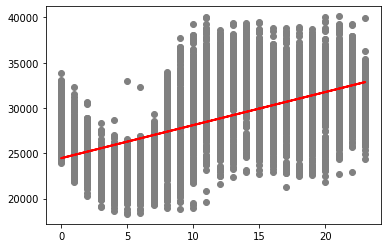

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 3106.362194032686
Mean Squared Error: 14161288.16606946
Root Mean Squared Error: 3763.1487036881044
Mean Absolute Percentage Error 11.138212520375902


Even though the MAPE is 11.13%, statistically,it is not a bad result.However,looking at the plot, there are lots of prediction are way off. Simple linear regression is not a good choice in this case, since there are some many factor could influence the result.

# Multiple Linear Regression

* "temp", "humidity" and "wind_speed" are all independent variables, "Total load actual as dependent variable"

In [23]:
X = merge.iloc[: , [2,3,6,7,8,10]].values
y = merge.iloc[: , 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)


36217.26908994601
[151.80009342 331.34480956 -29.00677234 -47.53271339 -77.70168353
  -1.49304113]


In [24]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,29116.0,31069.196197
1,20520.0,25036.085084
2,36698.0,32551.700731
3,31592.0,31069.702824
4,25727.0,26307.207977
...,...,...
6496,27480.0,26435.418526
6497,26022.0,27163.934134
6498,25566.0,26848.469778
6499,35328.0,29681.785334


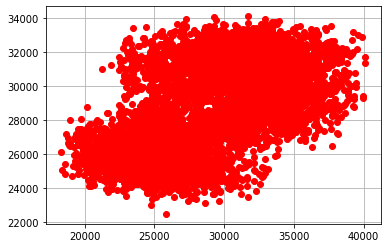

In [26]:
plt.plot(df['Actual'],df['Predicted'], 'ro')
plt.grid(True)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 3045.9355057207713
Mean Squared Error: 13743372.997148834
Root Mean Squared Error: 3707.205550970816
Mean Absolute Percentage Error 10.89172870964402


10.89% is the best result using 'day of week', 'hour', 'numth of day in a year', 'temperature', 'humidity' and 'wind_speed' as the feature.
It doesn't significantly improved. So as the Mean Squared Error, no significant reduction compare to the simple linear regression.